# //........In this project I am going to show
#                     what is the effect of different level of education of 
#                             different country on their GDP growth .........//

In [1]:
#importing required libraries for the implementaion of different operation on dataframe....

import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
%matplotlib notebook


In [ ]:
#importing Datafiles by using pandas library by provinding the path of each datafile....

df=pd.read_csv(r"C:\Users\LENOVO\Desktop\Project\GDP per capita (current US$).csv", skiprows=3)#GDP per capita datafile 
vs=pd.read_csv(r"C:\Users\LENOVO\Desktop\Project\School enrollment, preprimary (% gross).csv", skiprows=3)#primary education datafile
ss=pd.read_csv(r"C:\Users\LENOVO\Desktop\Project\School enrollment, secondary (% gross).csv", skiprows=3)#secondary education datafile
tt=pd.read_csv(r"C:\Users\LENOVO\Desktop\Project\School enrollment, tertiary (% gross).csv", skiprows=3)#tertiary education datafile
#df.head(5)


In [3]:
#Creating the Subset of Dataframe of GDP data File.......

df1=df.iloc[[11,18,33,35,38,75,79,107,117,136,182,249],:]

df1=df1.drop(['Country Code','Indicator Code','Indicator Name','2019','Unnamed: 64'],axis=1)#remove these columns

df1=df1.T#Transpose of dataframe df1

df1.head()#some head values of dataframe df1

,11,18,33,35,38,75,79,107,117,136,182,249
Country Name,Australia,Bangladesh,Canada,Switzerland,China,France,United Kingdom,India,Japan,Sri Lanka,Pakistan,United States
1960,1807.79,89.0352,2259.29,1787.36,89.5205,1334.69,1397.59,82.1886,478.995,142.78,82.3997,3007.12
1961,1874.73,97.5953,2240.43,1971.32,75.8058,1428.05,1472.39,85.3543,563.587,142.838,88.0186,3066.56
1962,1851.84,100.122,2268.59,2131.39,70.9094,1578.28,1525.78,89.8818,633.64,138.537,89.6864,3243.84
1963,1964.15,101.901,2374.5,2294.18,74.3136,1744.64,1613.46,101.126,717.867,117.072,93.8372,3374.52


In [4]:
# Here we are making country name row as a index of columns.......

df1=df1.rename(columns=df1.iloc[0]).drop(df1.index[0])
df1=df1.loc['2005':,:]
df1.head(10)

,Australia,Bangladesh,Canada,Switzerland,China,France,United Kingdom,India,Japan,Sri Lanka,Pakistan,United States
2005,33999.2,499.462,36266.2,54952.7,1753.42,34760.2,42030.3,714.861,37217.6,1248.7,683.09,44114.7
2006,36044.9,509.64,40385.9,57579.5,2099.23,36443.6,44599.7,806.753,35434,1435.82,836.861,46298.7
2007,40960.1,558.052,44543,63555.3,2693.97,41508.4,50566.8,1028.33,35275.2,1630.39,908.095,47976
2008,49601.7,634.987,46594.5,72487.8,3468.3,45334.1,47287,998.522,39339.3,2037.32,990.847,48382.6
2009,42772.4,702.264,40773.1,69927.4,3832.24,41575.4,38713.1,1101.96,40855.2,2090.4,957.996,47100
2010,52022.1,781.154,47450.3,74605.8,4550.45,40638.3,39435.8,1357.56,44507.7,2799.65,987.41,48467.5
2011,62517.8,861.758,52101.8,88415.6,5618.13,43790.7,42038.6,1458.1,48168,3200.83,1164.98,49886.8
2012,68012.1,883.105,52542.3,83538.2,6316.92,40874.7,42462.8,1443.88,48603.5,3350.52,1198.11,51610.6
2013,68150.1,981.84,52504.7,85112.5,7050.65,42592.9,43444.5,1449.61,40454.4,3610.29,1208.9,53117.7
2014,62510.8,1118.85,50835.5,86605.5,7651.37,43011.3,47425.6,1573.88,38109.4,3819.25,1251.16,55047.7


In [5]:
# Taking Information Regarding our reduce Data

df1.shape

(14, 12)

In [6]:
#Getting information regarding column names in dataframe and range of index

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2005 to 2018
Data columns (total 12 columns):
Australia         14 non-null object
Bangladesh        14 non-null object
Canada            14 non-null object
Switzerland       14 non-null object
China             14 non-null object
France            14 non-null object
United Kingdom    14 non-null object
India             14 non-null object
Japan             14 non-null object
Sri Lanka         14 non-null object
Pakistan          14 non-null object
United States     14 non-null object
dtypes: object(12)
memory usage: 1.4+ KB


In [7]:
# To show some importnat statical values of data....

df1.describe()

,Australia,Bangladesh,Canada,Switzerland,China,France,United Kingdom,India,Japan,Sri Lanka,Pakistan,United States
count,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
unique,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
top,52022.125596,702.26441,44543.041036,88415.610812,9770.847088,43790.732048,42462.771568,1981.268706,44507.676386,1630.388906,1164.976129,49886.818109
freq,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Finding Min and Max values of Each Column in Data Frame of GDP.....

print("..................Minimum values of GDP of country..............")
print()
print(df1.min())
print()
print("..................Maximum values of GDP of country..............")
print()
df1.max()



..................Minimum values of GDP of country..............

Australia         33999.242858
Bangladesh          499.461940
Canada            36266.187124
Switzerland       54952.675489
China              1753.417829
France            34760.187766
United Kingdom    38713.137428
India               714.861013
Japan             34524.469861
Sri Lanka          1248.698185
Pakistan            683.090235
United States     44114.747778
dtype: float64

..................Maximum values of GDP of country..............



Australia         68150.107041
Bangladesh         1698.262802
Canada            52542.346665
Switzerland       88415.610812
China              9770.847088
France            45334.114436
United Kingdom    50566.826596
India              2009.978857
Japan             48603.476650
Sri Lanka          4104.630983
Pakistan           1482.403063
United States     62886.836485
dtype: float64

In [9]:
#performing the normalzation of GDP of each country between 0 to 1 .

scaler=Normalizer().fit(df1)
df2=scaler.transform(df1)
df2=pd.DataFrame(df2,index=df1.index,columns=df1.columns)
print(df2)

      Australia  Bangladesh    Canada  Switzerland     China    France  \
2005   0.312950    0.004597  0.333816     0.505818  0.016140  0.319954   
2006   0.316499    0.004475  0.354615     0.505587  0.018433  0.319999   
2007   0.328584    0.004477  0.357327     0.509844  0.021611  0.332983   
2008   0.368848    0.004722  0.346486     0.539034  0.025791  0.337114   
2009   0.343354    0.005637  0.327305     0.561341  0.030763  0.333746   
2010   0.386757    0.005807  0.352768     0.554655  0.033830  0.302125   
2011   0.412408    0.005685  0.343697     0.583247  0.037061  0.288872   
2012   0.449239    0.005833  0.347057     0.551793  0.041725  0.269989   
2013   0.450622    0.006492  0.347171     0.562781  0.046620  0.281633   
2014   0.415333    0.007434  0.337761     0.575423  0.050837  0.285775   
2015   0.404147    0.008890  0.309720     0.584488  0.057204  0.260894   
2016   0.365247    0.010245  0.309031     0.585992  0.059049  0.270724   
2017   0.385033    0.011138  0.320938 

In [10]:


df2['Year']=df2.index # Making index(Year) as part of Dataframe and

df2.reset_index(inplace=True,drop=True)# Assigning New Index as 0,1,2......
df2

,Australia,Bangladesh,Canada,Switzerland,China,France,United Kingdom,India,Japan,Sri Lanka,Pakistan,United States,Year
0,0.312950,0.004597,0.333816,0.505818,0.016140,0.319954,0.386872,0.006580,0.342574,0.011494,0.006288,0.406059,2005
1,0.316499,0.004475,0.354615,0.505587,0.018433,0.319999,0.391615,0.007084,0.311134,0.012607,0.007348,0.406534,2006
2,0.328584,0.004477,0.357327,0.509844,0.021611,0.332983,0.405650,0.008249,0.282980,0.013079,0.007285,0.384866,2007
3,0.368848,0.004722,0.346486,0.539034,0.025791,0.337114,0.351636,0.007425,0.292535,0.015150,0.007368,0.359783,2008
4,0.343354,0.005637,0.327305,0.561341,0.030763,0.333746,0.310769,0.008846,0.327964,0.016781,0.007690,0.378094,2009
5,0.386757,0.005807,0.352768,0.554655,0.033830,0.302125,0.293185,0.010093,0.330891,0.020814,0.007341,0.360331,2010
6,0.412408,0.005685,0.343697,0.583247,0.037061,0.288872,0.277314,0.009619,0.317747,0.021115,0.007685,0.329086,2011
7,0.449239,0.005833,0.347057,0.551793,0.041725,0.269989,0.280478,0.009537,0.321039,0.022131,0.007914,0.340902,2012
8,0.450622,0.006492,0.347171,0.562781,0.046620,0.281633,0.287264,0.009585,0.267493,0.023872,0.007994,0.351225,2013
9,0.415333,0.007434,0.337761,0.575423,0.050837,0.285775,0.315104,0.010457,0.253206,0.025376,0.008313,0.365747,2014


In [11]:
##Finding the rate of GDP of each country ,here rate means , rate==(data of current year)-(data of previous year)....

dfn=df2.loc[:,"Australia":'United States']
dfn1=df2.loc[1:,"Australia":'United States']

dfn1.index=[0,1,2,3,4,5,6,7,8,9,10,11,12]#changing the index of dffkk data frame

dff=dfn1.subtract(dfn)#performing subtraction on whole data set dfn1 with dfn here each element of dfn1 get subtracted from respective element ofdfn
dffkk=df2.Year[1:]

dffkk.index=[0,1,2,3,4,5,6,7,8,9,10,11,12]#changing the index of dffkk data frame

dff["Year"]=dffkk

ll=dff.drop(13)
ll



,Australia,Bangladesh,Canada,Switzerland,China,France,United Kingdom,India,Japan,Sri Lanka,Pakistan,United States,Year
0,0.003549,-0.000122,0.020799,-0.000231,0.002293,0.000046,0.004743,0.000504,-0.031440,0.001114,0.001061,0.000475,2006
1,0.012086,0.000002,0.002712,0.004258,0.003179,0.012984,0.014035,0.001166,-0.028154,0.000472,-0.000063,-0.021668,2007
2,0.040264,0.000245,-0.010841,0.029190,0.004180,0.004131,-0.054014,-0.000824,0.009555,0.002071,0.000083,-0.025083,2008
3,-0.025494,0.000916,-0.019181,0.022306,0.004972,-0.003368,-0.040867,0.001421,0.035429,0.001631,0.000322,0.018311,2009
4,0.043403,0.000170,0.025464,-0.006686,0.003067,-0.031621,-0.017584,0.001247,0.002927,0.004033,-0.000349,-0.017763,2010
5,0.025651,-0.000123,-0.009071,0.028592,0.003231,-0.013253,-0.015871,-0.000474,-0.013144,0.000301,0.000344,-0.031245,2011
6,0.036831,0.000148,0.003359,-0.031454,0.004664,-0.018884,0.003164,-0.000081,0.003292,0.001016,0.000229,0.011816,2012
7,0.001383,0.000659,0.000115,0.010988,0.004895,0.011644,0.006786,0.000048,-0.053546,0.001741,0.000080,0.010322,2013
8,-0.035289,0.000942,-0.009411,0.012643,0.004217,0.004142,0.027841,0.000872,-0.014287,0.001504,0.000319,0.014523,2014
9,-0.011186,0.001456,-0.028040,0.009065,0.006367,-0.024881,0.005153,0.000976,-0.007364,0.001995,0.001348,0.038875,2015


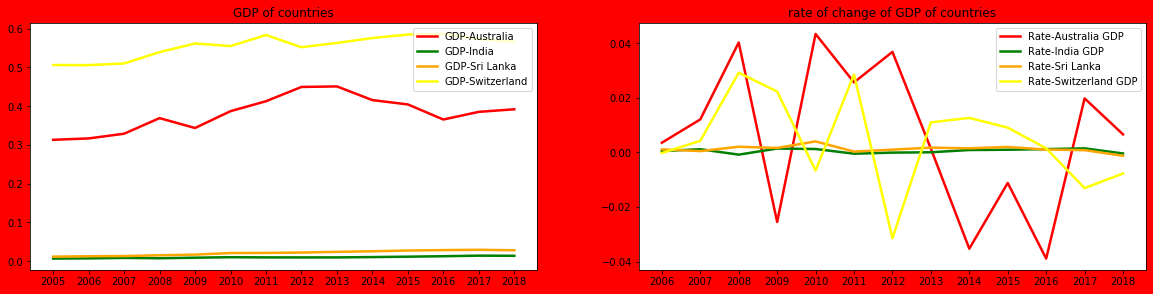

In [12]:
#.......Graph of rate of each country on same plot.....

#Plot of GDP of countries on single plot....


xx=df2['Year']
yx=df2['Australia']
yx1=df2['India']
yx2=df2['Sri Lanka']
yx3=df2['Switzerland']


x=ll['Year']
y=ll["Australia"]
y1=ll["India"]
y2=ll["Sri Lanka"]
y3=ll["Switzerland"]

fig = plt.figure(figsize=(20,10) ,facecolor=(1,0,0,1))#creating workspace for plot

ax=fig.add_subplot(221)#adding the plot in workspace at postion 1 which is divided into 2 row 2 col. 
ax1=fig.add_subplot(222)#adding the plot in workspace at postion 2 which is divided into 2 row 2 col. 


#ploting the line plot on different data......
ax.plot(xx,yx,color='red',linewidth=2.5)
ax.plot(xx,yx1,color='green',linewidth=2.5)
ax.plot(xx,yx2,color='Orange',linewidth=2.5)
ax.plot(xx,yx3,color='yellow',linewidth=2.5)
ax.set(title="GDP of countries")



ax1.plot(x,y,color='red',linewidth=2.5)
ax1.plot(x,y1,color='green',linewidth=2.5)
ax1.plot(x,y2,color='Orange',linewidth=2.5)
ax1.plot(x,y3,color='yellow',linewidth=2.5)
ax1.set(title="rate of change of GDP of countries")

#for labeling the information on grap we perform below operation...

ax.legend(['GDP-Australia','GDP-India',"GDP-Sri Lanka",'GDP-Switzerland'], loc='upper right')
ax1.legend(['Rate-Australia GDP','Rate-India GDP','Rate-Sri Lanka','Rate-Switzerland GDP'], loc='upper right')


plt.show()

In [13]:
#Creating the Subset of Data PRIMARY EDUCATION with normalization [0,1] of each country.....

vs1=vs.iloc[[11,18,33,35,38,75,79,107,117,136,182,249],:]

vs1=vs1.drop(['Country Code','Indicator Code','Indicator Name','2019','Unnamed: 64'],axis=1)#to remove these columns.

vs1=vs1.T
vs1=vs1.rename(columns=vs1.iloc[0]).drop(vs1.index[0])#creating the country name row as index of columns.

vs1=vs1.loc['2005':,:]

vs1=vs1.fillna(vs1.mean())#filling the mean value in place of none value of respective columns

vs1=vs1.drop(['Canada',"Japan"], axis = 1)#removing canada and japan from colums

scaler=Normalizer().fit(vs1)#performing ther normalization

vs2=scaler.transform(vs1)

vs2=pd.DataFrame(vs2,index=vs1.index,columns=vs1.columns)

vs2['Year']=vs2.index

vs2.reset_index(inplace=True,drop=True)#making default index like-0,1,2,....


vs2

,Australia,Bangladesh,Switzerland,China,France,United Kingdom,India,Sri Lanka,Pakistan,United States,Year
0,0.372207,0.048859,0.422800,0.280771,0.473333,0.305259,0.026695,0.390698,0.197608,0.303066,2005
1,0.356001,0.116734,0.430817,0.182808,0.471110,0.309096,0.029448,0.390510,0.275087,0.306743,2006
2,0.347808,0.115553,0.425388,0.190454,0.464587,0.309905,0.029601,0.386559,0.306701,0.303640,2007
3,0.341248,0.113607,0.419941,0.196875,0.453946,0.333645,0.035571,0.380050,0.321444,0.298527,2008
4,0.347358,0.047915,0.436863,0.214159,0.458880,0.340592,0.032229,0.350066,0.311760,0.304927,2009
5,0.335264,0.055983,0.422603,0.229062,0.452088,0.348968,0.030759,0.383407,0.299596,0.299221,2010
6,0.389265,0.104720,0.408538,0.245115,0.432199,0.347357,0.031508,0.370534,0.287124,0.286950,2011
7,0.424938,0.107324,0.392641,0.269944,0.414537,0.331629,0.031178,0.373509,0.283005,0.280145,2012
8,0.424955,0.128186,0.401436,0.284109,0.409160,0.309581,0.037558,0.370319,0.285233,0.279208,2013
9,0.437056,0.104527,0.405644,0.292605,0.400714,0.335605,0.045270,0.357854,0.258312,0.279025,2014


In [14]:
#Creating the Subset of Data SECONDARY EDUCATION with normalization of each country...similary as above explained each line of code.

ss1=ss.iloc[[11,18,33,35,38,75,79,107,117,136,182,249],:]
ss1=ss1.drop(['Country Code','Indicator Code','Indicator Name','2019','Unnamed: 64'],axis=1)
ss1=ss1.T
ss1=ss1.rename(columns=ss1.iloc[0]).drop(ss1.index[0])
ss1=ss1.loc['2005':,:]
ss1=ss1.fillna(ss1.mean())
ss1=ss1.drop(['Canada',"Japan"], axis = 1) 
scaler=Normalizer().fit(ss1)
ss2=scaler.transform(ss1)
ss2=pd.DataFrame(ss2,index=ss1.index,columns=ss1.columns)
ss2['Year']=ss2.index
ss2.reset_index(inplace=True,drop=True)
ss2



,Australia,Bangladesh,Switzerland,China,France,United Kingdom,India,Sri Lanka,Pakistan,United States,Year
0,0.522669,0.159911,0.325024,0.274757,0.363598,0.358969,0.183768,0.336012,0.087295,0.323660,2005
1,0.528751,0.163725,0.330783,0.245704,0.368332,0.338421,0.189055,0.339923,0.106304,0.333228,2006
2,0.525631,0.165400,0.328434,0.262949,0.365357,0.332828,0.196133,0.337917,0.112667,0.331261,2007
3,0.522210,0.157316,0.326212,0.277993,0.362093,0.334559,0.205337,0.335718,0.112395,0.329106,2008
4,0.518760,0.168974,0.323094,0.288792,0.359046,0.338534,0.201470,0.333500,0.111042,0.326931,2009
5,0.515633,0.173463,0.322856,0.296195,0.357506,0.345680,0.212022,0.325380,0.111458,0.318609,2010
6,0.520957,0.177947,0.327237,0.273857,0.361827,0.318233,0.224849,0.335905,0.114605,0.325794,2011
7,0.519979,0.187026,0.326832,0.273343,0.358448,0.310139,0.233784,0.336881,0.118242,0.326057,2012
8,0.498376,0.195356,0.321081,0.261987,0.338890,0.401877,0.223247,0.323023,0.116890,0.312298,2013
9,0.496583,0.183625,0.316316,0.261044,0.334595,0.408887,0.239857,0.319242,0.120736,0.313563,2014


In [15]:
#Creating the Subset of Data TERCERY EDUCATION with normalization of each country....similary as above explained each line of code.


tt1=tt.iloc[[11,18,33,35,38,75,79,107,117,136,182,249],:]
tt1=tt1.drop(['Country Code','Indicator Code','Indicator Name','2019','Unnamed: 64'],axis=1)
tt1=tt1.T
tt1=tt1.rename(columns=tt1.iloc[0]).drop(tt1.index[0])
tt1=tt1.loc['2005':,:]
tt1=tt1.fillna(tt1.mean())
tt1=tt1.drop(['Canada',"Japan"], axis = 1) 
scaler=Normalizer().fit(tt1)
tt2=scaler.transform(tt1)
tt2=pd.DataFrame(tt2,index=tt1.index,columns=tt1.columns)
tt2['Year']=tt2.index
tt2.reset_index(inplace=True,drop=True)


tt2

,Australia,Bangladesh,Switzerland,China,France,United Kingdom,India,Sri Lanka,Pakistan,United States,Year
0,0.682457,0.037420,0.265872,0.110791,0.312762,0.342271,0.061990,0.105781,0.028578,0.468049,2005
1,0.664555,0.041608,0.263044,0.114284,0.304519,0.333668,0.064924,0.103006,0.028185,0.504675,2006
2,0.664854,0.044860,0.267148,0.116044,0.299409,0.330776,0.074229,0.103052,0.031754,0.504903,2007
3,0.665214,0.050265,0.276293,0.117028,0.296900,0.320485,0.085135,0.103108,0.031432,0.505176,2008
4,0.660305,0.060981,0.281638,0.126043,0.296381,0.325177,0.090032,0.102347,0.038183,0.501448,2009
5,0.646427,0.069692,0.291057,0.133046,0.301745,0.323966,0.098052,0.089818,0.042939,0.509245,2010
6,0.638881,0.074399,0.296064,0.139368,0.302265,0.321394,0.123701,0.082703,0.045075,0.510280,2011
7,0.633396,0.074350,0.299103,0.154753,0.311971,0.320015,0.130738,0.092277,0.050616,0.501961,2012
8,0.638305,0.068816,0.305492,0.176083,0.324920,0.309664,0.129183,0.102587,0.052828,0.481697,2013
9,0.628099,0.074070,0.305733,0.226674,0.328602,0.302179,0.135864,0.102814,0.051605,0.473463,2014


In [16]:
#Finding the rate of Primary education of each country here rate means , Rate==data of current year-data of previous year, example
# rate of 2006==(data of year 2006)-(data of year 2005)

vsn=vs2.loc[:,"Australia":'United States']
vsn1=vs2.loc[1:,"Australia":'United States']
vsn1.index=[0,1,2,3,4,5,6,7,8,9,10,11,12]
vsf=vsn1.subtract(vsn)
vsfkk=vs2.Year[1:]
vsfkk.index=[0,1,2,3,4,5,6,7,8,9,10,11,12]
vsf["Year"]=vsfkk
llvs=vsf.drop(13)
llvs

,Australia,Bangladesh,Switzerland,China,France,United Kingdom,India,Sri Lanka,Pakistan,United States,Year
0,-0.016206,0.067875,0.008017,-0.097963,-0.002223,0.003838,0.002753,-0.000189,0.077479,0.003678,2006
1,-0.008193,-0.001181,-0.005429,0.007646,-0.006523,0.000809,0.000153,-0.003951,0.031614,-0.003103,2007
2,-0.006561,-0.001946,-0.005447,0.006421,-0.010641,0.023740,0.005970,-0.006509,0.014742,-0.005113,2008
3,0.006110,-0.065692,0.016922,0.017285,0.004934,0.006947,-0.003342,-0.029984,-0.009683,0.006400,2009
4,-0.012094,0.008068,-0.014259,0.014903,-0.006792,0.008376,-0.001470,0.033341,-0.012164,-0.005706,2010
5,0.054001,0.048737,-0.014065,0.016053,-0.019889,-0.001611,0.000750,-0.012873,-0.012472,-0.012271,2011
6,0.035673,0.002604,-0.015897,0.024829,-0.017661,-0.015728,-0.000330,0.002974,-0.004119,-0.006806,2012
7,0.000018,0.020862,0.008794,0.014165,-0.005378,-0.022048,0.006380,-0.003190,0.002228,-0.000937,2013
8,0.012101,-0.023659,0.004208,0.008497,-0.008446,0.026024,0.007712,-0.012464,-0.026921,-0.000183,2014
9,0.021237,0.014845,-0.018483,-0.002428,-0.012948,0.037912,0.000157,-0.020320,-0.003082,-0.013302,2015


In [17]:
#Finding the rate of Secondary education of each country......

ssn=ss2.loc[:,"Australia":'United States']
ssn1=ss2.loc[1:,"Australia":'United States']
ssn1.index=[0,1,2,3,4,5,6,7,8,9,10,11,12]
ssf=ssn1.subtract(ssn)
ssfkk=ss2.Year[1:]
ssfkk.index=[0,1,2,3,4,5,6,7,8,9,10,11,12]
ssf["Year"]=ssfkk
llss=ssf.drop(13)
llss

,Australia,Bangladesh,Switzerland,China,France,United Kingdom,India,Sri Lanka,Pakistan,United States,Year
0,0.006083,0.003814,0.005759,-0.029053,0.004734,-0.020548,0.005287,0.003910,0.019010,0.009568,2006
1,-0.003121,0.001675,-0.002349,0.017244,-0.002975,-0.005593,0.007079,-0.002006,0.006362,-0.001967,2007
2,-0.003421,-0.008084,-0.002222,0.015045,-0.003264,0.001731,0.009204,-0.002199,-0.000272,-0.002156,2008
3,-0.003450,0.011658,-0.003118,0.010798,-0.003047,0.003975,-0.003867,-0.002218,-0.001353,-0.002174,2009
4,-0.003127,0.004489,-0.000238,0.007403,-0.001540,0.007147,0.010552,-0.008120,0.000416,-0.008322,2010
5,0.005323,0.004484,0.004381,-0.022338,0.004321,-0.027448,0.012827,0.010526,0.003147,0.007185,2011
6,-0.000978,0.009079,-0.000406,-0.000514,-0.003379,-0.008094,0.008935,0.000975,0.003636,0.000262,2012
7,-0.021603,0.008330,-0.005751,-0.011356,-0.019558,0.091738,-0.010537,-0.013858,-0.001351,-0.013758,2013
8,-0.001793,-0.011731,-0.004765,-0.000943,-0.004295,0.007010,0.016610,-0.003780,0.003846,0.001264,2014
9,0.004673,0.025686,0.007315,-0.003697,-0.004833,-0.011741,-0.004277,-0.004521,0.005572,-0.002119,2015


In [18]:
#Finding the rate of tercery education of each country....

ttn=tt2.loc[:,"Australia":'United States']
ttn1=tt2.loc[1:,"Australia":'United States']

ttn1.index=[0,1,2,3,4,5,6,7,8,9,10,11,12]

ttf=ttn1.subtract(ttn)

ttfkk=tt2.Year[1:]
ttfkk.index=[0,1,2,3,4,5,6,7,8,9,10,11,12]
ttf["Year"]=ttfkk
lltt=ttf.drop(13)
lltt

,Australia,Bangladesh,Switzerland,China,France,United Kingdom,India,Sri Lanka,Pakistan,United States,Year
0,-0.017903,0.004187,-0.002828,0.003493,-0.008244,-0.008604,0.002934,-0.002775,-0.000394,0.036627,2006
1,0.000299,0.003252,0.004104,0.001759,-0.005110,-0.002892,0.009305,0.000046,0.003569,0.000227,2007
2,0.000360,0.005406,0.009145,0.000985,-0.002508,-0.010291,0.010906,0.000056,-0.000321,0.000274,2008
3,-0.004909,0.010715,0.005345,0.009015,-0.000520,0.004693,0.004897,-0.000761,0.006751,-0.003728,2009
4,-0.013878,0.008711,0.009418,0.007002,0.005364,-0.001211,0.008021,-0.012530,0.004755,0.007796,2010
5,-0.007546,0.004707,0.005007,0.006323,0.000520,-0.002572,0.025649,-0.007115,0.002136,0.001036,2011
6,-0.005485,-0.000049,0.003039,0.015385,0.009706,-0.001379,0.007037,0.009574,0.005541,-0.008319,2012
7,0.004909,-0.005534,0.006388,0.021330,0.012949,-0.010351,-0.001555,0.010310,0.002212,-0.020264,2013
8,-0.010206,0.005254,0.000241,0.050591,0.003682,-0.007485,0.006681,0.000227,-0.001223,-0.008234,2014
9,-0.002113,-0.007173,-0.001174,0.016311,0.002760,-0.004212,0.005413,0.001463,-0.002914,-0.004337,2015


In [19]:
print("..................Minimum values of rate of GDP from year 2006 to 2018 of country..............")
print()
print(ll.min())
print()
print("..................Maximum values of rate of GDP from year 2006 to 2018 of country..............")
print()
ll.max()

..................Minimum values of rate of GDP from year 2006 to 2018 of country..............

Australia           -0.038900
Bangladesh          -0.000123
Canada              -0.028040
Switzerland         -0.031454
China                0.001845
France              -0.031621
United Kingdom      -0.054014
India               -0.000824
Japan               -0.053546
Sri Lanka           -0.001238
Pakistan            -0.000349
United States       -0.031245
Year              2006.000000
dtype: float64

..................Maximum values of rate of GDP from year 2006 to 2018 of country..............



Australia            0.043403
Bangladesh           0.001456
Canada               0.025464
Switzerland          0.029190
China                0.006367
France               0.012984
United Kingdom       0.027841
India                0.001470
Japan                0.037712
Sri Lanka            0.004033
Pakistan             0.001348
United States        0.038875
Year              2018.000000
dtype: float64

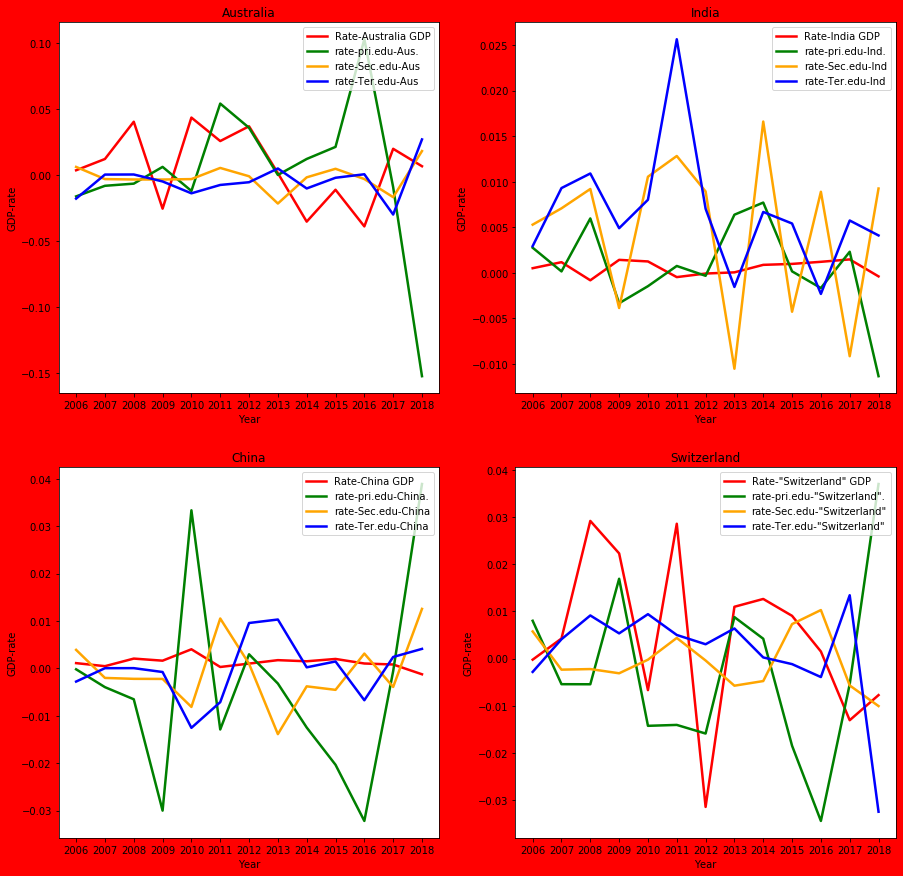

In [20]:
#Plot of rate of some countries and rate of each level of education on same plot.........

x=ll['Year']
y=ll['Australia']
y1=llvs['Australia']
y2=llss['Australia']
y3=lltt['Australia']

yy=ll["India"]
yy1=llvs["India"]
yy2=llss["India"]
yy3=lltt["India"]

yz=ll["Sri Lanka"]
yz1=llvs["Sri Lanka"]
yz2=llss["Sri Lanka"]
yz3=lltt["Sri Lanka"]

yx=ll["Switzerland"]
yx1=llvs["Switzerland"]
yx2=llss["Switzerland"]
yx3=lltt["Switzerland"]

#Creating the workspace for ploting the Graph.....
fig = plt.figure(figsize=(15,15) ,facecolor=(1,0,0,1))

#adding the subplot in the workspace which is divided into 2 row and 2 col.
ax=fig.add_subplot(221)
ax1=fig.add_subplot(222)
ax2=fig.add_subplot(223)
ax3=fig.add_subplot(224)


ax.plot(x,y,color='red',linewidth=2.5)
ax.plot(x,y1,color='green',linewidth=2.5)
ax.plot(x,y2,color='Orange',linewidth=2.5)
ax.plot(x,y3,color='blue',linewidth=2.5)
ax.set(xlabel="Year",ylabel="GDP-rate",title="Australia")


ax1.plot(x,yy,color='red',linewidth=2.5)
ax1.plot(x,yy1,color='green',linewidth=2.5)
ax1.plot(x,yy2,color='Orange',linewidth=2.5)
ax1.plot(x,yy3,color='blue',linewidth=2.5)
ax1.set(xlabel="Year",ylabel="GDP-rate",title="India")


ax2.plot(x,yz,color='red',linewidth=2.5)
ax2.plot(x,yz1,color='green',linewidth=2.5)
ax2.plot(x,yz2,color='Orange',linewidth=2.5)
ax2.plot(x,yz3,color='blue',linewidth=2.5)
ax2.set(xlabel="Year",ylabel="GDP-rate",title="China")


ax3.plot(x,yx,color='red',linewidth=2.5)
ax3.plot(x,yx1,color='green',linewidth=2.5)
ax3.plot(x,yx2,color='Orange',linewidth=2.5)
ax3.plot(x,yx3,color='blue',linewidth=2.5)
ax3.set(xlabel="Year",ylabel="GDP-rate",title="Switzerland")

#for labeling the graph we perform the below operation.

ax.legend(['Rate-Australia GDP','rate-pri.edu-Aus.','rate-Sec.edu-Aus','rate-Ter.edu-Aus'], loc='upper right')

ax1.legend(['Rate-India GDP','rate-pri.edu-Ind.','rate-Sec.edu-Ind','rate-Ter.edu-Ind'], loc='upper right')

ax2.legend(['Rate-China GDP','rate-pri.edu-China.','rate-Sec.edu-China','rate-Ter.edu-China'], loc='upper right')

ax3.legend(['Rate-"Switzerland" GDP','rate-pri.edu-"Switzerland".','rate-Sec.edu-"Switzerland"','rate-Ter.edu-"Switzerland"'], loc='upper right')


plt.show()

These are the steps taken for all above interpretation :------

1--Importing all the libraries generaly required for performance of operation.

2--Importing all the datafiles () in form of dataframe by using the pd.read_csv() metho dform pandas library.

3--Creating the sub dataframe from frames by using loc and iloc methods.

4--Performing Normalization on all sub dataframe by using sklearn library to make each data value in 0 to 1 range.

5--Performing the different operation on dataframe to make new dataframe whcih contain the rate value of data. e.g--> Rate of GDP of year 2006==(data of year 2006)-(data of year 2005).

6--After finding the rate of each sub dataframe I have plotted graph of some countries which have:-

     **Rate of change in GDP per capita (current US$)
     **Rate of change in School enrollment, preprimary (% gross)
     **Rate of change in School enrollment, secondary (% gross)
     **Rate of change in School enrollment, tertiary (% gross)
     
     
# ##From the above graph I have observed that:--

# --> In case of AUSTRALIA the growth of GDP in this case Tertiary education is more dominating after it primary education. The rate of GDP is partialy correspond to the rate of Tertiary education.

#  -->In case of INDIA the rate of growth of GDP is have very less deviation so I can not conclude.

#  -->In case of SRILANKA from 2009 to 2012 the rate of primary education show dominance effect on rate of GDP they are particaly praportion to each other between 2009 to 2012

# -->In case of SWITZERLAND from 2009 to 2017 the rate of primay education is correspond to the rate of GDP of it. Rate of Tertiary education from 2012 to 2018 also correspond the rate of GDP. 

#  //..From above discussion I can say that different level of education can have different effect on the different countries GDP some where primary show more effect some where tertiary education or secondary depends on the countries..//